##  Project 2 : Classification  :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
# 1. Comment on factors  affecting mostly to diabetes.
# 2. Comment on age distribution.
# 3. Comment on Pregnancies and its relation with diabetes.
# 4. Comment on glucose levels of patients also determine its relation with age and diabetes.
# 5. Comment on bp levels of patients also determine its relation with BMI, age and diabetes.

In [4]:
# # 2. Comment on age distribution.

df['Age'].describe().round(2)

count    768.00
mean      33.24
std       11.76
min       21.00
25%       24.00
50%       29.00
75%       41.00
max       81.00
Name: Age, dtype: float64

<Axes: ylabel='Age'>

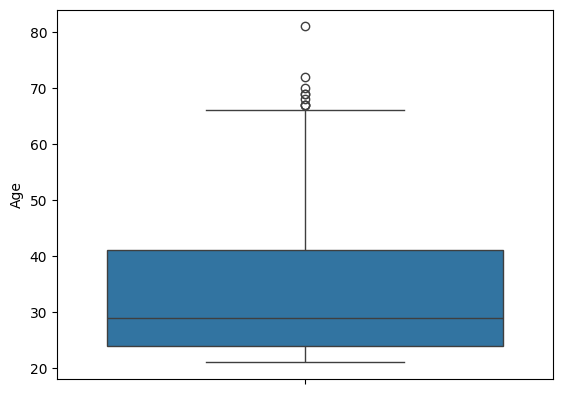

In [5]:
sns.boxplot(df['Age'])

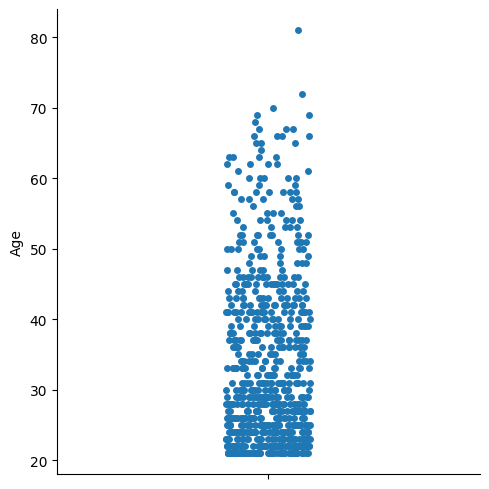

In [6]:
sns.catplot(df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

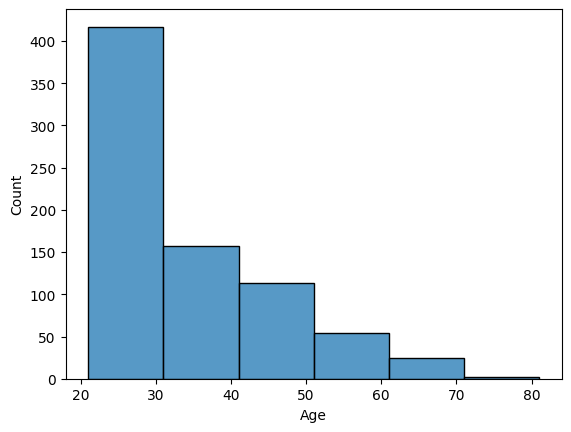

In [7]:
sns.histplot(df['Age'], bins= 6)

In [8]:
# Pregnancies 

df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

In [9]:
df[['Pregnancies', 'Age', 'Outcome']].corr().round(2)

,Pregnancies,Age,Outcome
Pregnancies,1.00,0.54,0.22
Age,0.54,1.00,0.24
Outcome,0.22,0.24,1.00


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
# 4. Comment on glucose levels of patients also determine its relation with age and diabetes.

In [13]:
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [14]:
df[['Glucose', 'Age', 'Outcome']].corr().round(2)

,Glucose,Age,Outcome
Glucose,1.00,0.26,0.47
Age,0.26,1.00,0.24
Outcome,0.47,0.24,1.00


In [15]:
# 5. Comment on bp levels of patients also determine its relation with BMI, age and diabetes.

In [16]:
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [17]:
df[['Glucose', 'Age','BloodPressure', 'Outcome']].corr().round(2)

,Glucose,Age,BloodPressure,Outcome
Glucose,1.00,0.26,0.15,0.47
Age,0.26,1.00,0.24,0.24
BloodPressure,0.15,0.24,1.00,0.07
Outcome,0.47,0.24,0.07,1.00


In [18]:
# Dataset 

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
# Null Values

df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
# Outliers

df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [21]:
X = df.drop('Outcome', axis =1 )

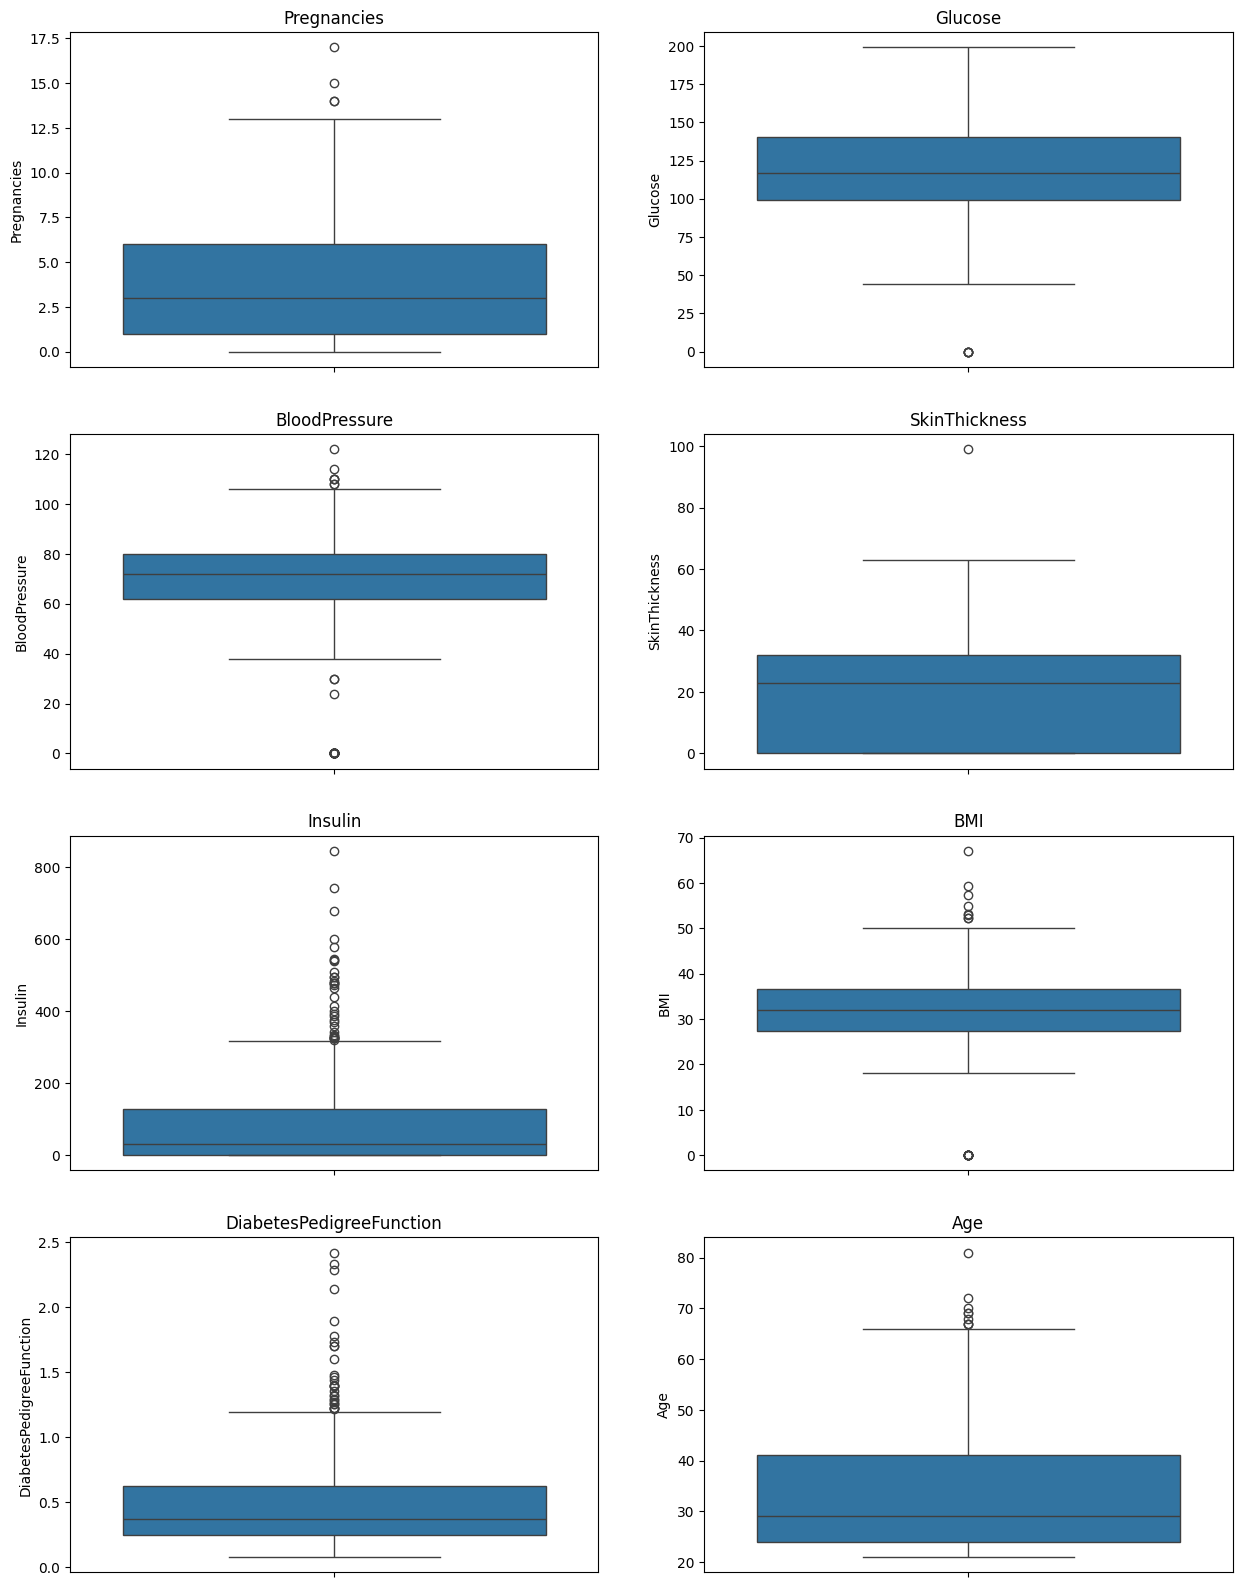

In [22]:
plt.figure(figsize = [15, 20])
for i in range(len(X.columns  )) : 
    plt.subplot(4,2,i+1)
    sns.boxplot(df[X.columns[i]])
    plt.title(X.columns[i])    

In [23]:
# Treat Outliers for atleast 2 columns.

# 1. insulin    

In [24]:
# Determine Threshold of Outlier.

df['Insulin'].quantile( .95 )

np.float64(293.0)

In [25]:
df.shape

(768, 9)

In [26]:
np.sum(df['Insulin'] > 293)

np.int64(38)

In [27]:
# Replace values greater than 293 with 293. 

df['Insulin'] = [293                     if i > 293  else i         for i in df['Insulin'] ]

<Axes: ylabel='Insulin'>

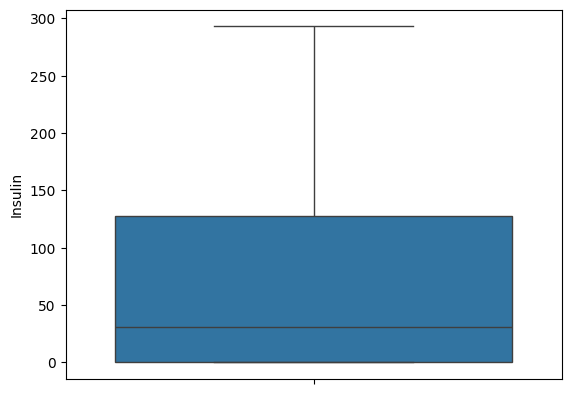

In [28]:
sns.boxplot(df['Insulin'])

In [29]:
df['Insulin'].describe()

count    768.000000
mean      72.462240
std       90.568989
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      293.000000
Name: Insulin, dtype: float64

In [30]:
# 2. BMI

In [31]:
df['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [32]:
df['BMI'] = [50      if i > 50 else i    for i in df['BMI']]

<Axes: ylabel='BMI'>

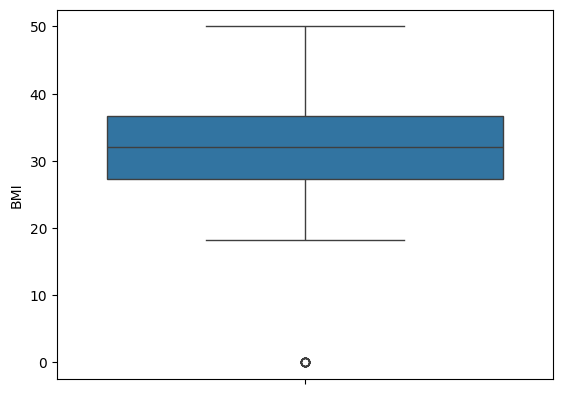

In [33]:
sns.boxplot(df['BMI'])

In [34]:
df[df['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [35]:
# Replace BMI == 0 with median.

df['BMI'] = [ 32     if i == 0 else i    for i in df['BMI']]           # Median = 32

<Axes: ylabel='BMI'>

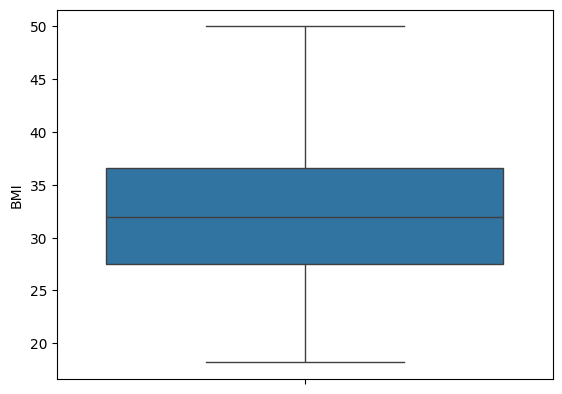

In [36]:
sns.boxplot(df['BMI'])

In [37]:
# Separate I/P and O/P.

In [38]:
X  = df.drop('Outcome', axis= 1)
Y = df['Outcome']

In [39]:
X.shape, Y.shape

((768, 8), (768,))

In [40]:
# Split Data into Training and testing 

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= .10, random_state=123)

In [43]:
# Apply Logistic Regression 

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
LR = LogisticRegression(max_iter=1000)

In [46]:
# Train Model. 

In [47]:
LR.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Predict Outcomes 

LR_Pred  =  LR.predict(X_test)

In [49]:
# Evaluate Outcome

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [51]:
# Confusion Matrix 
confusion_matrix(Y_test, LR_Pred)

array([[43,  4],
       [11, 19]])

In [53]:
# Accuracy Score 

accuracy_score(Y_test, LR_Pred) 

0.8051948051948052

In [54]:
# Classification Report 

print(classification_report(Y_test, LR_Pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        47
           1       0.83      0.63      0.72        30

    accuracy                           0.81        77
   macro avg       0.81      0.77      0.78        77
weighted avg       0.81      0.81      0.80        77



In [ ]:
# Outliers 
# Pre-processing   |   Scaling , One hot Encoding 
# Feature Selection 

In [ ]:
# Logistic Regression 

In [ ]:
# Logistic Regression  = Linear Regression + Sigmoid Function 

In [ ]:
X_test.head(2)

In [ ]:
Y_test[:5]

In [ ]:
LR_Pred[:5]

In [ ]:
LR.coef_[0]

In [ ]:
# 236

Y1 = np.dot(  X_test.iloc[3].values ,  LR.coef_[0] ) + LR.intercept_    # Output of regression 
Y1

In [ ]:
# Sigmoid Function 

# 1 / 1 + e^(-x)

In [ ]:
np.int8(np.round(1 / (1 + (np.e ** (-Y1)) )))

In [ ]:
df.nunique()

In [ ]:
# Accuracy : 81%
# Scaling  : 

In [ ]:
# Scaling 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm = MinMaxScaler()

In [ ]:
X_mm = mm.fit_transform(X)

In [ ]:
X_mm_df = pd.DataFrame(X_mm, index=X.index, columns=X.columns)
X_mm_df

In [ ]:
# Train Test Split 

In [ ]:
# Train Model

In [ ]:
# Predict Outcomes

In [ ]:
# Evaluate 

In [ ]:
# Accuracy :     81%
# Scaling  :     81%

In [55]:
# Apply Decision Tree

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [56]:
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [57]:
print(classification_report( Y_test,DTC.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        47
           1       0.75      0.60      0.67        30

    accuracy                           0.77        77
   macro avg       0.76      0.74      0.74        77
weighted avg       0.76      0.77      0.76        77

